Supervised Machine Learning

Supervised learning is a type of machine learning where the model is trained on labeled data. This means that for each training example, the input comes with a correct output.


1. Types of Problems

Regression

Goal: Predict a continuous output.

Examples:

Predicting house prices based on size and location.

Estimating temperature based on weather data.

Algorithm examples: Linear Regression, Ridge Regression, Decision Trees for Regression.

Classification

Goal: Predict a discrete label or category.

Examples:

Identifying if an email is spam or not.

Classifying types of flowers based on petal and sepal features.

Algorithm examples: Logistic Regression, Support Vector Machines, k-Nearest Neighbors, Decision Trees, Random Forests

2. Key Components of Supervised Machine Learning

Labeled Data

Dataset that contains both input features (X) and corresponding correct outputs (Y).

Example:

Input (X): [Size=1500 sq ft, Bedrooms=3]

Output (Y): $300,000

Hypothesis (Model)

A function or algorithm the model uses to make predictions.

Represented mathematically as:

h_θ(x)=θ_0+θ_1*x_1+θ_2*x_2+…+θ_n*x_n
​

The goal is to find the best θ (theta) values that make good predictions.

Cost Function (Loss Function)

Measures how far off the model’s predictions are from the actual values.

For regression:

𝐽(𝜃)=(1/2𝑚)∑(ℎ_𝜃(𝑥_𝑖)−(𝑦_𝑖))^2

For classification: Cross-Entropy Loss is commonly used.

Optimizer

The method used to minimize the cost function by adjusting the model parameters.

Common optimizers:

Gradient Descent

Stochastic Gradient Descent (SGD)

Adam Optimizer (especially in deep learning)

Linear Regression Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Given data
X = np.array([1, 2, 3, 4, 5])  # Features
y = np.array([2, 4, 6, 8, 10])  # True values (y = 2x)

In [3]:
# Initialize parameters
theta0, theta1 = 0.0, 0.0

In [4]:
# Hyperparameters
alpha = 0.1  # Learning rate
iterations = 3
m = len(X)    # Number of examples

In [5]:
# Store cost history for plotting
cost_history = []

In [6]:
# Gradient Descent Implementation
def gradient_descent(X, y, theta0, theta1, alpha, iterations):
    for it in range(iterations):
        # 1. Compute predictions
        y_pred = theta0 + theta1 * X
        
        # 2. Compute cost (MSE)
        cost = (1/(2*m)) * np.sum((y_pred - y)**2)
        cost_history.append(cost)
        
        # 3. Compute gradients
        grad_theta0 = (1/m) * np.sum(y_pred - y)
        grad_theta1 = (1/m) * np.sum((y_pred - y) * X)
        
        # 4. Update parameters
        theta0 = theta0 - alpha * grad_theta0
        theta1 = theta1 - alpha * grad_theta1
        
        print(f"Iteration {it+1}: theta0 = {theta0:.2f}, theta1 = {theta1:.2f}, Cost = {cost:.2f}")
    
    return theta0, theta1

In [7]:
# Run gradient descent
print("=== Gradient Descent ===")
theta0, theta1 = gradient_descent(X, y, theta0, theta1, alpha, iterations)

=== Gradient Descent ===
Iteration 1: theta0 = 0.60, theta1 = 2.20, Cost = 22.00
Iteration 2: theta0 = 0.48, theta1 = 1.80, Cost = 0.76
Iteration 3: theta0 = 0.49, theta1 = 1.88, Cost = 0.05


In [8]:
# Final model
print(f"\nFinal model: y = {theta0:.2f} + {theta1:.2f}x")


Final model: y = 0.49 + 1.88x


In [9]:
# Generate predictions
y_pred = theta0 + theta1 * X

In [10]:
# Regression Evaluation Metrics
print("\n=== Evaluation Metrics ===")
print(f"MSE: {mean_squared_error(y, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}")
print(f"R² Score: {r2_score(y, y_pred):.2f}")


=== Evaluation Metrics ===
MSE: 0.05
RMSE: 0.21
R² Score: 0.99


Text(0.5, 1.0, 'Training Curve')

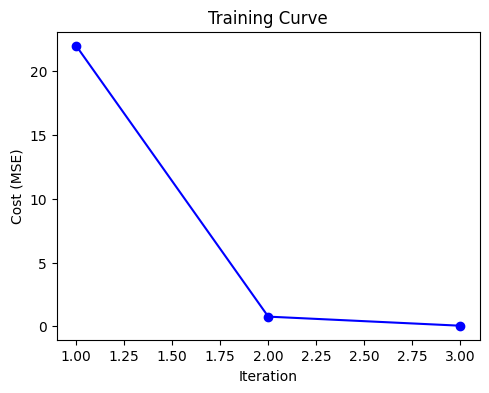

In [11]:
# Training Curve (Cost vs Iterations)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, iterations+1), cost_history, 'bo-')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Training Curve')

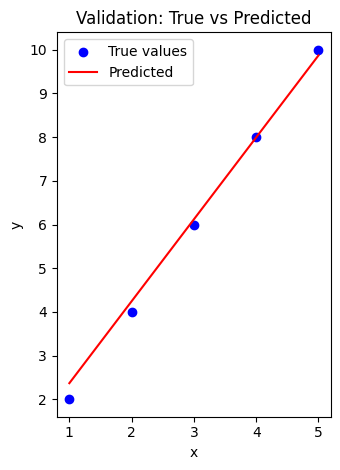

In [12]:
# Validation Curve (True vs Predicted)
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='True values')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Validation: True vs Predicted')

plt.tight_layout()
plt.show()